# 相關函式庫介紹

* ###  Tensorflow
Tensorflow是由Google Brain創建的一個深度學習函式庫，用於訓練和部署機器學習模型，它是目前業界最廣泛使用的深度學習框架之一。它提供了一個靈活且高效的方式來建立、訓練和部署機器學習模型。它支援各種不同的應用領域，包括圖像和語音辨識、自然語言處理、推薦系統等等。TensorFlow 的核心概念是計算圖 (computational graph)，它使用節點 (node) 和邊 (edge) 的方式來表示數學計算操作和數據流動。

* ###  Keras
Keras 是一個高階的神經網路應用程式接口，它運行在 TensorFlow、Theano 和 CNTK 等深度學習框架之上。它的目標是提供一個簡單、直觀且方便快捷的方式來建立深度學習模型。Keras 的設計原則是用戶友好性、模塊性和可擴展性。它提供了一系列簡單易用的函數和類別，可以幫助用戶快速在五分鐘內快速地構建和訓練各種類型的神經網路模型

* ### matplotlib
資料視覺化函式庫，它能夠幫助我們觀看資料當前的型態，例如:圖片、折線圖、散點圖、向量圖...等資料型態
 

# 安裝函式庫與相關依賴

In [1]:
!pip install tensorflow==2.3.0
!pip install matplotlib
!pip install protobuf==3.20.*

You should consider upgrading via the 'c:\users\austin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\austin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\austin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


# Google Colab使用說明

當電腦性能不足時，可以透過Google Colab來執行此程式，但需要注意以下幾點:

### 1. 需連接Google 雲端硬碟
> 若我們要在Google Colab中執行程式並讀取本地端資料，例如資料集、模型、文件等，我們可以使用以下程式碼來連接到Google雲端硬碟。當我們執行這段程式碼後，會跳雲端授權通知，選擇你要連接的Google帳戶後就可以在Colab中存取你的Google雲端硬碟中的檔案了。
--------------------------------
```
from google.colab import drive

# 將Google雲端硬碟掛載到Colab環境
drive.mount('/content/drive')
```
--------------------------------


### 2. 需修改程式中的路徑
> 程式中的路徑皆是本地端的"相對路徑"，因此當我們連接上雲端後，還需要將路徑修改為雲端路徑而在Google Colab的路徑為`/content/drive/My Drive/`
--------------------------------
```
/content/drive/My Drive/{雲端中的資料夾或檔案路徑}
# 舉例來說原始程式碼為
model.save_weights('model_weights.h5')

# 需修改成
model.save_weights('/content/drive/My Drive/model_weights.h5')

```
--------------------------------

## 更多使用方式可以參考以下連接:
* 【Lecture】 Google Colab 使用教學:  
https://www.youtube.com/watch?v=OyS6K2XdgbQ&ab_channel=MeDA

* Google Colab 實用奧步篇 ( 連結硬碟、繪圖中文顯示問題 )  
https://ithelp.ithome.com.tw/articles/10234373

# 導入必備的函式庫

In [2]:
import numpy as np 
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical 
import matplotlib.pyplot as plt 

# 讀取MNIST手寫辨識資料集
![MNIST資料集圖片](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
* 圖像來源:維基百科


In [3]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data() 
print('Train Features Shape:', x_train.shape, 'labels Shape:', y_train.shape)
print('Valid Features Shape:', x_valid.shape, 'labels Shape:', y_valid.shape)

Train Features Shape: (60000, 28, 28) labels Shape: (60000,)
Valid Features Shape: (10000, 28, 28) labels Shape: (10000,)


# 顯示第0筆資料

Label: 5


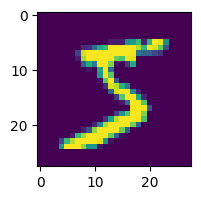

In [4]:
print('Label:', y_train[0])
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])
plt.show()

# 資料前處理(Data Preprocessing)

In [5]:
# 將28 x 28 攤平為 784
reshape_train = x_train.reshape(x_train.shape[0], -1)
reshape_valid = x_valid.reshape(x_valid.shape[0], -1)

# 資料正規化(將0~255縮放為0~1)
norm_train = reshape_train/255
norm_valid = reshape_valid/255

# One-hot encoding
onehot_train = to_categorical(y_train)
onehot_valid = to_categorical(y_valid)


print('Train Features Shape:', reshape_train.shape, 'labels Shape:', onehot_train.shape)
print('Valid Features Shape:', reshape_valid.shape, 'labels Shape:', onehot_valid.shape)

Train Features Shape: (60000, 784) labels Shape: (60000, 10)
Valid Features Shape: (10000, 784) labels Shape: (10000, 10)


# 建立DNN模型
>因目標任務是分類圖像資料，所以我們的Loss Function選用`categorical_crossentropy`，而這個Loss Function必須要將輸出`Softmax`計算後才能夠使用。詳細設定可以觀看[Keras官方網站](https://keras.io/zh/losses/)

名稱 | 神經元數量 | 激勵函數
:---: | :---: | :---:
輸入層 | 784 | 無
隱藏層 | 256 | ReLU
隱藏層 | 128 | ReLU
輸出層 | 10 |  Softmax




In [6]:
# 建立模型
model = Sequential()
# 輸入層與隱藏層
model.add(Dense(units=256,input_dim=784, activation='relu'))
# 隱藏層
model.add(Dense(units=128, activation='relu'))
# 輸出層
model.add(Dense(units=10,activation='softmax')) # 分類任務通常都使用softmax

# 建立損失函數與優化器

>若我們想要定義自己的優化器超參數，可以使用`keras.optimizers`來新增自己的優化器。詳細設定可以查看[Keras官方網站](https://keras.io/zh/optimizers/)
```
# 重新定義Adam
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# 將定義的優化器放到compile
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
```

In [7]:
model.compile(loss='categorical_crossentropy', # 分類任務選擇交叉熵作為Loss function
              optimizer='adam',  # 最常使用優化器
              metrics=['accuracy']) # 顯示模式(顯示準確率)

# 開始訓練模型
### 該如何判別模型的好壞? 何謂Over fitting? Validation的用處? 

#### 筆者在這裡推薦一個介紹非常詳細的影片
* [台大教授李宏毅老師【機器學習2021】機器學習任務攻略](https://youtu.be/WeHM2xpYQpw)



In [8]:
history = model.fit(norm_train, # 訓練資料
                    onehot_train, # 訓練標籤
                    batch_size=128, #一次丟入多少資料訓練資料
                    epochs=10, # 訓練次數
                    verbose=1, # 顯示模式 0 = 不顯示, 1 = 進度條, 2 = 只顯示每行結果
                    validation_data=(norm_valid, onehot_valid)) # 驗證數據集

Epoch 1/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.9241 - val_loss: 0.1217 - val_accuracy: 0.9635
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.1044 - accuracy: 0.9691 - val_loss: 0.0930 - val_accuracy: 0.9726
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0475 - accuracy: 0.9852 - val_loss: 0.0697 - val_accuracy: 0.9779
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0681 - val_accuracy: 0.9804
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.0685 - val_accuracy: 0.9801
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0713 - val_accuracy: 0.9798
Epoch 

In [9]:
# 只儲存權重
model.save_weights('model_weights.h5')

# 儲存模型
model.save('model.h5')

In [10]:
# 使用save_weights需重新創建模型
model = Sequential()
model.add(Dense(units=256,input_dim=784, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10,activation='softmax')) 

# 將訓練好的權重讀取回來
model.load_weights('model_weights.h5')


In [11]:
from tensorflow.keras.models import load_model

# 使用load_model讀取模型
model = load_model('model.h5')

In [12]:
expand_data = np.expand_dims(norm_valid[0], axis = 0) 
model.predict(expand_data)

array([[4.4165997e-11, 4.0712331e-10, 2.1468269e-09, 4.4566903e-07,
        2.4211335e-13, 1.9023569e-09, 2.1720745e-17, 9.9999940e-01,
        1.9782317e-10, 6.1616419e-08]], dtype=float32)

Label: 7


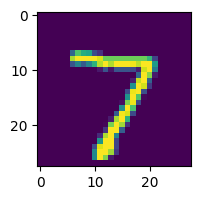

In [13]:
pred = np.argmax(model.predict(expand_data), axis = 1)
print('Label:', pred[0])
plt.figure(figsize=(2,2))
plt.imshow(x_valid[0])
plt.show()